In [3]:
from time import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.metrics import precision_score, classification_report, confusion_matrix
from sklearn.externals import joblib

In [4]:
df = pd.read_csv('horse_racing_with_raceid.csv')
df.head()

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,0,0.0,3,60,0,1020.0,133,7,9.7,3.7,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,3,60,0,980.0,133,12,16.0,4.9,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,3,60,0,1082.0,132,8,3.5,1.5,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,3,60,0,1118.0,127,13,39.0,11.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,3,60,0,972.0,131,14,50.0,14.0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'win_odds', 'place_odds',
       'surface', 'distance', 'race_class', 'horse_country_AUS',
       'horse_country_BRZ', 'horse_country_CAN', 'horse_country_FR',
       'horse_country_GB', 'horse_country_GER', 'horse_country_GR',
       'horse_country_IRE', 'horse_country_ITY', 'horse_country_JPN',
       'horse_country_NZ', 'horse_country_SAF', 'horse_country_USA',
       'horse_country_ZIM', 'horse_type_Colt', 'horse_type_Filly',
       'horse_type_Gelding', 'horse_type_Grey', 'horse_type_Horse',
       'horse_type_Mare', 'horse_type_Rig', 'horse_type_Roan', 'venue_ST',
       'config_A+3', 'config_B', 'config_B+2', 'config_C', 'config_C+3',
       'going_GOOD', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING',
       'going_SLOW', 'going_SOFT', 'going_WET FAST', 'going_WET SLOW',
       'going_YIELDING', 'going_YIELDING TO SOFT'],
      dtype='object')

In [6]:
df.shape

(75710, 50)

In [7]:
last_raceid = max(df.race_id)
last_raceid

6128

In [8]:
# split the last race data for deployment
last_race = df[df.race_id == last_raceid]
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
75696,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
75697,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
75698,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
75699,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
75700,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
75701,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
75702,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
75703,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
75704,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
75705,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [9]:
new_data = df[:75696]   # drop the last race data for modeling
new_data = new_data.drop(columns='race_id')
new_data.tail()

,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
75691,0.0,4,84,1,1115.0,121,4,99.0,26.0,0,...,1,0,1,0,0,0,0,0,0,0
75692,0.0,5,84,1,1167.0,121,12,85.0,13.0,0,...,1,0,1,0,0,0,0,0,0,0
75693,0.0,8,83,1,1097.0,113,2,14.0,3.9,0,...,1,0,1,0,0,0,0,0,0,0
75694,0.0,6,83,1,1092.0,118,8,99.0,24.0,0,...,1,0,1,0,0,0,0,0,0,0
75695,0.0,4,81,1,1098.0,111,13,3.1,1.5,0,...,1,0,1,0,0,0,0,0,0,0


In [10]:
new_data.shape

(75696, 49)

In [11]:
X = new_data.drop(columns='won')
y = new_data['won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # precision ratio: tp / (tp + fp), aiming at minimize fp (predict: win, actual: lose)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [13]:
# find the highest precision score of the positive class (1)
import operator
max(scores.items(), key=operator.itemgetter(1))

(8, 0.3170731707317073)

Text(0, 0.5, 'Precision Score of the positive class (1)')

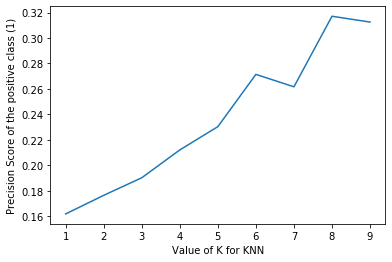

In [14]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')

In [15]:
start = time()

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 3.20453 sec


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     13918
         1.0       0.32      0.01      0.02      1222

    accuracy                           0.92     15140
   macro avg       0.62      0.50      0.49     15140
weighted avg       0.87      0.92      0.88     15140



[[13890    28]
 [ 1209    13]]


Text(0, 0.5, 'True')

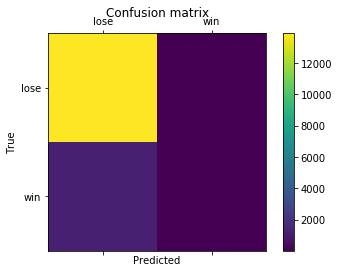

In [17]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [18]:
# save the model for deployment
joblib.dump(knn, 'knn_original_data.pkl')

['knn_original_data.pkl']

In [19]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [20]:
max(scores.items(), key=operator.itemgetter(1))

(8, 0.15118616807398472)

Text(0, 0.5, 'Precision Score of the positive class (1)')

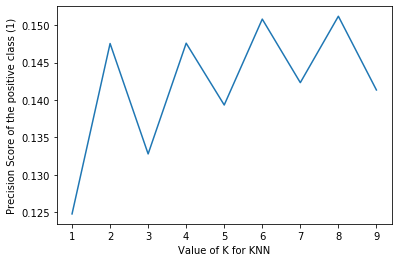

In [21]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')

In [22]:
start = time()

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_rus, y_rus)
y_pred = knn.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 0.90943 sec


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     13918
         1.0       0.15      0.62      0.24      1222

    accuracy                           0.69     15140
   macro avg       0.55      0.66      0.52     15140
weighted avg       0.89      0.69      0.76     15140



[[9696 4222]
 [ 470  752]]


Text(0, 0.5, 'True')

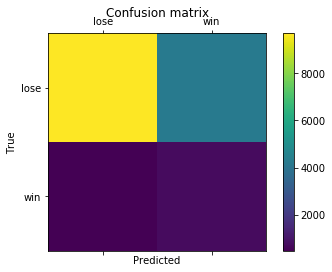

In [24]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [25]:
joblib.dump(knn, 'knn_rus.pkl')

['knn_rus.pkl']

In [26]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sm, y_sm)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [27]:
max(scores.items(), key=operator.itemgetter(1))

(2, 0.15355805243445692)

Text(0, 0.5, 'Precision Score of the positive class (1)')

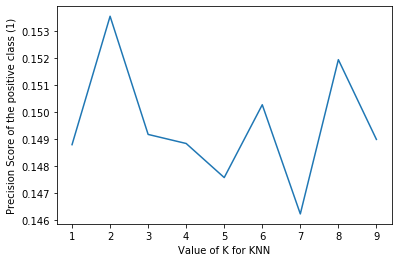

In [28]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')

In [29]:
start = time()

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_sm, y_sm)
y_pred = knn.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 6.71622 sec


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     13918
         1.0       0.15      0.27      0.20      1222

    accuracy                           0.82     15140
   macro avg       0.54      0.57      0.55     15140
weighted avg       0.87      0.82      0.84     15140



[[12110  1808]
 [  894   328]]


Text(0, 0.5, 'True')

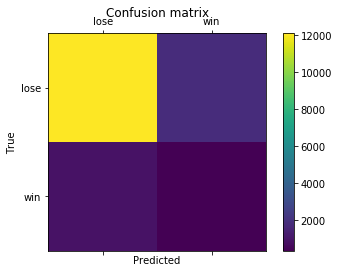

In [31]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [32]:
joblib.dump(knn, 'knn_sm.pkl')

['knn_sm.pkl']

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel and GPU learning.
* Capable of handling large-scale data.

In [33]:
start = time()

d_train = lgb.Dataset(X_train, label = y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 0.56963 sec


In [34]:
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.0995:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     13918
         1.0       0.28      0.40      0.33      1222

    accuracy                           0.87     15140
   macro avg       0.61      0.66      0.63     15140
weighted avg       0.89      0.87      0.88     15140



[[12631  1287]
 [  729   493]]


Text(0, 0.5, 'True')

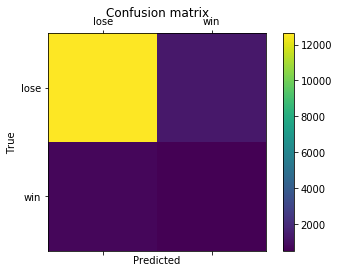

In [36]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

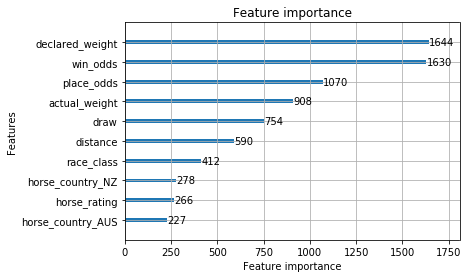

In [38]:
# plot model’s feature importances (original data)
lgb.plot_importance(clf, max_num_features=10)

In [39]:
graph = lgb.create_tree_digraph(clf, tree_index=3, show_info=['split_gain'])
graph.render(view=True)
# depth = 11

'Digraph.gv.pdf'

In [37]:
joblib.dump(clf, 'lgb_original_data.pkl')

['lgb_original_data.pkl']

In [40]:
X_rus = pd.DataFrame(X_rus, columns=list(X_train))
X_rus.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3.0,60.0,0.0,989.0,108.0,10.0,75.0,14.0,0.0,1200.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,36.0,1.0,1077.0,127.0,4.0,5.9,1.6,0.0,1200.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,64.0,1.0,1099.0,115.0,4.0,78.0,11.0,1.0,1200.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,60.0,0.0,1126.0,114.0,5.0,48.0,8.2,0.0,1650.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,60.0,0.0,1098.0,119.0,8.0,60.0,10.0,0.0,1400.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
start = time()

d_train = lgb.Dataset(X_rus, label = y_rus)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 0.08401 sec


In [42]:
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.55:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     13918
         1.0       0.30      0.35      0.32      1222

    accuracy                           0.88     15140
   macro avg       0.62      0.64      0.63     15140
weighted avg       0.89      0.88      0.88     15140



[[12898  1020]
 [  793   429]]


Text(0, 0.5, 'True')

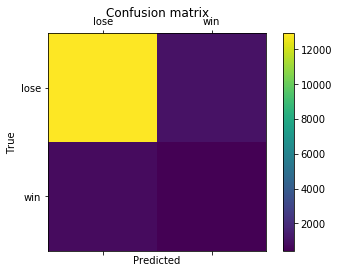

In [44]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

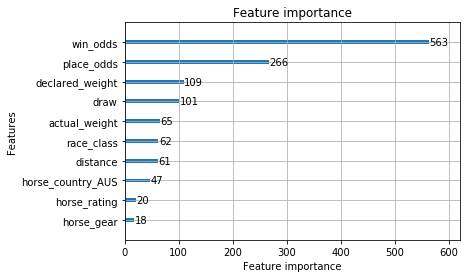

In [45]:
# plot model’s feature importances (Random Under-sampling)
lgb.plot_importance(clf, max_num_features=10)

In [46]:
graph = lgb.create_tree_digraph(clf, tree_index=3, show_info=['split_gain'])
graph.render(view=True)
# depth = 5

'Digraph.gv.pdf'

In [47]:
joblib.dump(clf, 'lgb_rus.pkl')

['lgb_rus.pkl']

In [48]:
X_sm = pd.DataFrame(X_sm, columns=list(X_train))
X_sm.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3.0,60.0,0.0,989.0,133.0,13.0,4.7,2.1,0.0,1600.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,39.0,1.0,1134.0,132.0,2.0,16.0,5.2,0.0,1200.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,60.0,0.0,1064.0,131.0,7.0,8.8,2.7,0.0,1400.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,60.0,0.0,1052.0,132.0,8.0,7.5,2.4,0.0,1800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,51.0,0.0,1066.0,119.0,10.0,57.0,12.0,0.0,1400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
start = time()

d_train = lgb.Dataset(X_sm, label = y_sm)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 1.02051 sec


In [50]:
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.5:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.95     13918
         1.0       0.36      0.09      0.15      1222

    accuracy                           0.91     15140
   macro avg       0.64      0.54      0.55     15140
weighted avg       0.88      0.91      0.89     15140



[[13714   204]
 [ 1109   113]]


Text(0, 0.5, 'True')

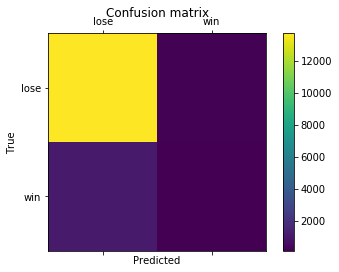

In [52]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

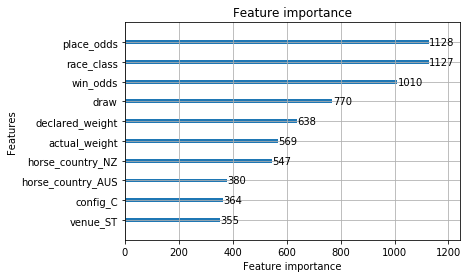

In [53]:
# plot model’s feature importances (SMOTE)
lgb.plot_importance(clf, max_num_features=10)

In [54]:
joblib.dump(clf, 'lgb_sm.pkl')

['lgb_sm.pkl']

In [63]:
conclusion = pd.read_excel('conclusion.xlsx', index_col=0)
conclusion

,Size,Time (sec),Precision (0),Precision (1),F1-score (0),F1-score (1),TP,FP
kNN_original_data,49.1 MB,3.20453,0.92,0.32,0.96,0.02,13,28
kNN_rus,8 MB,0.90943,0.95,0.15,0.81,0.24,752,4222
kNN_sm,90.6 MB,6.71622,0.93,0.15,0.90,0.20,328,1808
lgb_original_data,729 KB,0.56963,0.95,0.28,0.93,0.33,493,1287
lgb_rus,130 KB,0.08401,0.94,0.30,0.93,0.32,429,1020
lgb_sm,823 KB,1.02051,0.93,0.36,0.95,0.15,113,204


In [64]:
conclusion = conclusion.drop(columns='Size')
pd.DataFrame(conclusion.idxmax()).T

,Time (sec),Precision (0),Precision (1),F1-score (0),F1-score (1),TP,FP
0,kNN_sm,kNN_rus,lgb_sm,kNN_original_data,lgb_original_data,kNN_rus,kNN_rus


In [65]:
pd.DataFrame(conclusion.idxmin()).T

,Time (sec),Precision (0),Precision (1),F1-score (0),F1-score (1),TP,FP
0,lgb_rus,kNN_original_data,kNN_rus,kNN_rus,kNN_original_data,kNN_original_data,kNN_original_data


* By processing a lot of data, kNN model with over-sampling took the longest time, while LightGBM with under-sampling took the shortest time. 
* kNN models performed relatively worse with low precision score and f1-score. 
* Training models aimed at minimize False Positive (predict: win, actual: lose), but it seems TP and FP is correlated. Same as gambling and investment, you have the chance to win and the risk to lose at the same time.
* File sizes of LightGBM models are incredibly small and the time spent on training models is really quick. 

LightGBM code reference: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc